<a href="https://colab.research.google.com/github/tsato-code/colab_notebooks/blob/main/1dcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# os
!cat /etc/issue

Ubuntu 18.04.5 LTS \n \l



In [2]:
# storage
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay          69G   39G   30G  57% /
tmpfs            64M     0   64M   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
shm             5.8G     0  5.8G   0% /dev/shm
/dev/sda1        75G   40G   35G  54% /opt/bin
tmpfs           6.4G   24K  6.4G   1% /var/colab
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [3]:
# ram
!free -h

              total        used        free      shared  buff/cache   available
Mem:            12G        548M         10G        1.0M        2.0G         11G
Swap:            0B          0B          0B


In [4]:
# cpu
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2299.998
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs
bogomips	: 4599.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management:

processor	:

In [5]:
# gpu
!cat /proc/driver/nvidia/gpus/0000:00:04.0/information

Model: 		 Tesla K80
IRQ:   		 35
GPU UUID: 	 GPU-aae388f5-9487-55f4-89ed-09fd1be13c78
Video BIOS: 	 80.21.25.00.01
Bus Type: 	 PCI
DMA Size: 	 40 bits
DMA Mask: 	 0xffffffffff
Bus Location: 	 0000:00:04.0
Device Minor: 	 0
Blacklisted:	 No


In [18]:
# cpu/gpu type
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 7538396547423654062, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11154422528
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 16701640975823921766
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [21]:
# cuda
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [20]:
# gpu
!nvidia-smi

Mon Mar  8 14:44:02 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P0    58W / 149W |    841MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [6]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers.convolutional import Conv1D, UpSampling1D
from keras.layers.pooling import MaxPooling1D
from keras.utils import plot_model

import matplotlib.pyplot as plt
%matplotlib inline

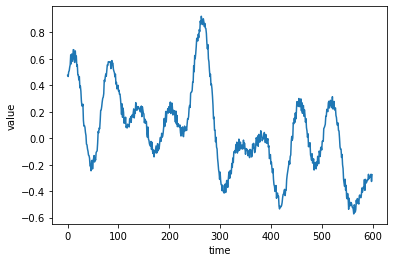

In [7]:
timeline = np.arange(10000)


def sinnp(n, line):
    return np.sin(line * n / 100)


def cosnp(n, line):
    return np.cos(line * n / 100)


raw_data = (sinnp(1, timeline) + sinnp(3, timeline) + sinnp(10, timeline) + cosnp(5, timeline) + cosnp(7, timeline)) / 5
raw_data = raw_data + (np.random.rand(len(timeline)) * 0.1)

plt.plot(timeline[:600], raw_data[:600])
plt.xlabel('time')
plt.ylabel('value')
plt.show()

In [8]:
input_data = []
output_data = []

for n in range(10000-80):
    input_data.append(raw_data[n:n+64])
    output_data.append(raw_data[n+64:n+80])

input_data = np.array(input_data)
output_data = np.array(output_data)

print(input_data.shape)
print(output_data.shape)

(9920, 64)
(9920, 16)


In [9]:
train_X = np.reshape(input_data, (-1, 64, 1))
train_Y = np.reshape(output_data, (-1, 16, 1))

print(train_X.shape)
print(train_Y.shape)

(9920, 64, 1)
(9920, 16, 1)


In [10]:
model = Sequential()
model.add(Conv1D(64, 8, padding='same', input_shape=(64, 1), activation='relu'))
model.add(MaxPooling1D(2, padding='same'))
model.add(Conv1D(64, 8, padding='same', activation='relu'))
model.add(MaxPooling1D(2, padding='same'))
model.add(Conv1D(32, 8, padding='same', activation='relu'))
model.add(Conv1D(1, 8, padding='same', activation='tanh'))

model.compile(loss='mse', optimizer='adam')

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 64, 64)            576       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 32, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 32, 64)            32832     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 16, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 16, 32)            16416     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 16, 1)             257       
Total params: 50,081
Trainable params: 50,081
Non-trainable params: 0
____________________________________________________

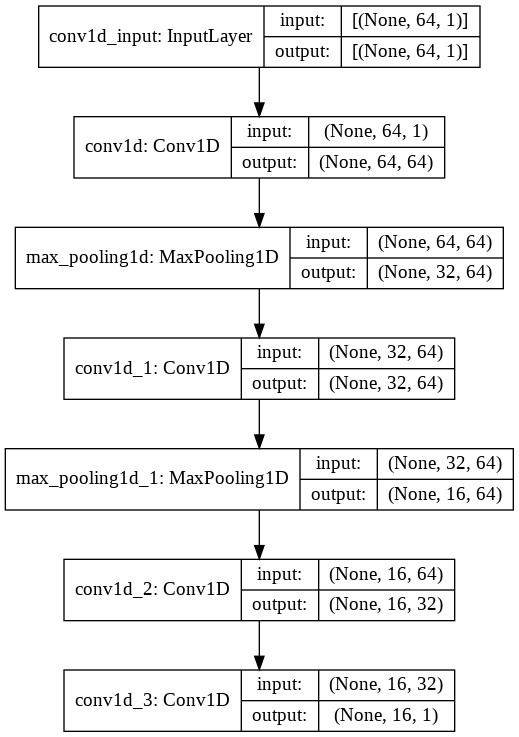

In [12]:
plot_model(
    model,
    show_shapes=True,
)

In [13]:
epochs = 20
history = model.fit(train_X, train_Y, validation_split=0.1, epochs=epochs)

Epoch 1/20
279/279 [==============================] - 31s 6ms/step - loss: 0.0539 - val_loss: 0.0101
Epoch 2/20
279/279 [==============================] - 1s 4ms/step - loss: 0.0086 - val_loss: 0.0056
Epoch 3/20
279/279 [==============================] - 1s 5ms/step - loss: 0.0051 - val_loss: 0.0043
Epoch 4/20
279/279 [==============================] - 1s 5ms/step - loss: 0.0043 - val_loss: 0.0040
Epoch 5/20
279/279 [==============================] - 1s 5ms/step - loss: 0.0040 - val_loss: 0.0036
Epoch 6/20
279/279 [==============================] - 1s 5ms/step - loss: 0.0034 - val_loss: 0.0030
Epoch 7/20
279/279 [==============================] - 1s 4ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 8/20
279/279 [==============================] - 1s 4ms/step - loss: 0.0029 - val_loss: 0.0029
Epoch 9/20
279/279 [==============================] - 1s 4ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 10/20
279/279 [==============================] - 1s 5ms/step - loss: 0.0027 - val_loss: 0.002

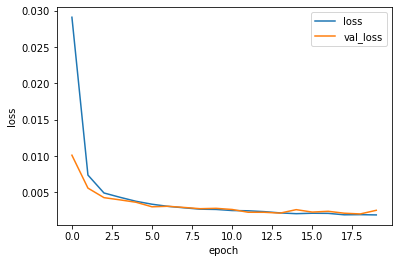

In [14]:
plt.plot(range(epochs), history.history['loss'], label='loss')
plt.plot(range(epochs), history.history['val_loss'], label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend() 
plt.show()

In [15]:
start = 9100
sheed = np.reshape(raw_data[start:start+64], (1, 64, 1))
prediction = sheed

for i in range(20):
    res = model.predict(sheed)
    sheed = np.concatenate((sheed[:, 16:, :], res), axis=1)
    prediction = np.concatenate((prediction, res), axis=1)

(1, 384, 1)
(384,)


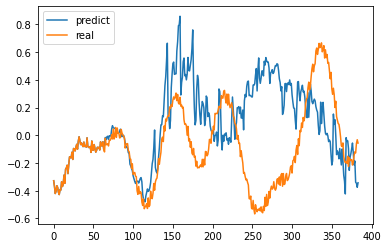

In [16]:
print(prediction.shape)
predictor = np.reshape(prediction, (-1))
print(predictor.shape)


plt.plot(range(len(predictor)), predictor, label='predict')
plt.plot(range(len(predictor)), raw_data[start:start+len(predictor)], label='real')
plt.legend()
plt.show()